In [232]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from collections import deque, Counter

Q1, 7

In [262]:
class Network(object):
    def __init__(self, num_nodes):
        self.adj = {i: set() for i in range(num_nodes)}

    def add_edge(self, i, j):
        self.adj[i].add(j)
        self.adj[j].add(i)

    def neighbors(self, i):
        return self.adj[i]

    def edge_list(self):
        return [(i, j) for i in self.adj for j in self.adj[i] if i < j]

class Poisson_Network(Network):
    def __init__(self, num_nodes, k_avg):
        super().__init__(num_nodes)

        S = np.array([i for i in range(num_nodes) for _ in range(np.random.poisson(k_avg))])
        S = np.random.permutation(S)
        if len(S) % 2:
            S = S[:-1]
        S = S.reshape(-1, 2)

        for k in range(len(S)):
            i, j = S[k][0], S[k][1]
            if i != j:
                self.add_edge(i, j)


class Geometric_Network(Network):
    def __init__(self, num_nodes, k_avg):
        super().__init__(num_nodes)

        S = np.array([i for i in range(num_nodes) for _ in range(np.random.geometric(1 / (k_avg + 1))-1)])
        S = np.random.permutation(S)
        if len(S) % 2:
            S = S[:-1]
        S = S.reshape(-1, 2)

        for k in range(len(S)):
            i, j = S[k][0], S[k][1]
            if i != j:
                self.add_edge(i, j)

Average: 10.0478


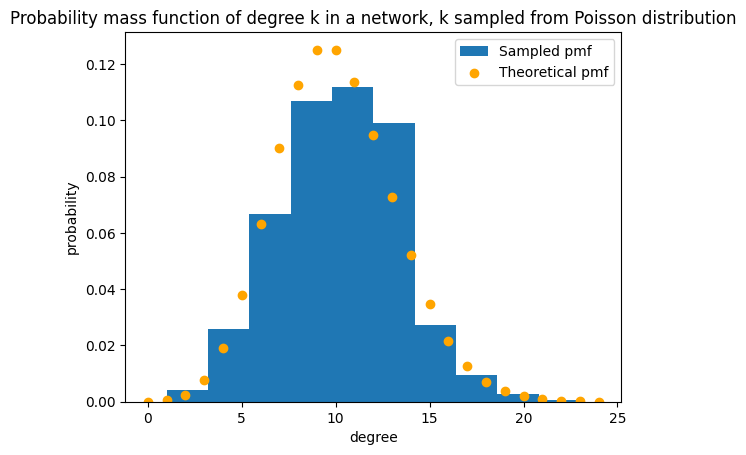

In [263]:
n = 10000
k_avg = 10

# Poisson distribution
poisson = Poisson_Network(n, k_avg)

count_list = [len(poisson.adj[i]) for i in poisson.adj]

print(f"Average: {sum(count_list)/len(count_list)}")

degree_list = np.arange(0, 25, 1)
probability_list = scipy.stats.poisson.pmf(degree_list, k_avg)

plt.hist(count_list, bins=10, density=True, label="Sampled pmf")
plt.scatter(degree_list, probability_list, label="Theoretical pmf", color="orange")
plt.title(f"Probability mass function of degree k in a network, k sampled from Poisson distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()

Average: 9.8251953125


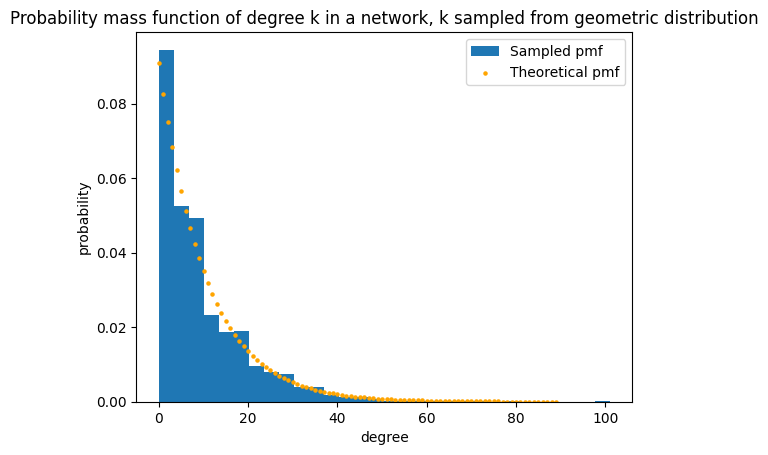

In [208]:
p = 1 / (k_avg + 1) 

# Geometric distribution
geometric = Geometric_Network(n, k_avg)

count_list = [len(geometric.adj[i]) for i in geometric.adj]
degree_list = np.arange(0, 90, 1)
probability_list = scipy.stats.geom.pmf(degree_list + 1, p)

print(f"Average: {sum(count_list)/len(count_list)}")

plt.hist(count_list, bins=30, density=True, label="Sampled pmf")
plt.scatter(degree_list, probability_list, label="Theoretical pmf", color="orange", s = 5)
plt.title(f"Probability mass function of degree k in a network, k sampled from geometric distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()

Q2, 4

Average degree of a random chosen node: 10.0278
Average degree of a random chosen friend: 11.0132


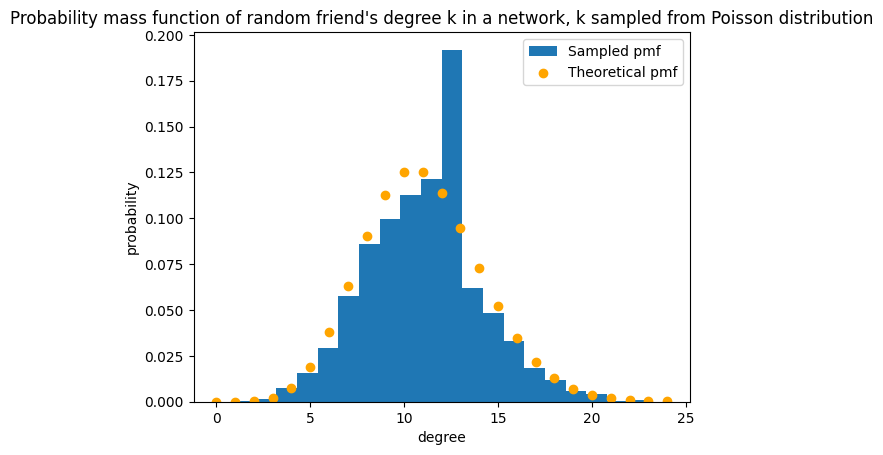

In [265]:
i_list, j_list = [], []

for _ in range(10000):
    i = np.random.randint(0, n)
    while not len(poisson.neighbors(i)): # the node has no friend
        i_list.append(0)
        i = np.random.randint(0, n)
    j = random.choices(list(poisson.neighbors(i)), k=1)[0]

    i_list.append(len(poisson.neighbors(i)))
    j_list.append(len(poisson.neighbors(j)))

print(f"Average degree of a random chosen node: {np.average(i_list)}")
print(f"Average degree of a random chosen friend: {np.average(j_list)}")


degree_list = np.arange(0, 25, 1)
p_list = scipy.stats.poisson.pmf(degree_list, k_avg)
q_list = degree_list*p_list / k_avg

plt.hist(j_list, bins=20, density=True, label="Sampled pmf")
plt.scatter(degree_list, q_list, color="orange", label="Theoretical pmf")
plt.title("Probability mass function of random friend's degree k in a network, k sampled from Poisson distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()

Average degree of a random chosen node: 10.8914
Average degree of a random chosen friend: 20.525


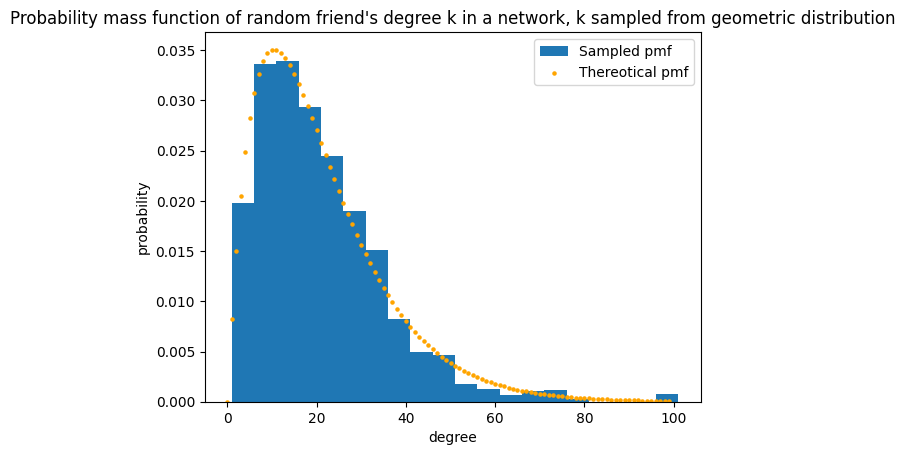

In [213]:
i_list, j_list = [], []

for _ in range(10000):
    i = np.random.randint(0, n)
    while not len(geometric.neighbors(i)): # the node has no friend
        i_list.append
        i = np.random.randint(0, n)
    j = random.choices(list(geometric.neighbors(i)), k=1)[0]

    i_list.append(len(geometric.neighbors(i)))
    j_list.append(len(geometric.neighbors(j)))

print(f"Average degree of a random chosen node: {np.average(i_list)}")
print(f"Average degree of a random chosen friend: {np.average(j_list)}")

degree_list = np.arange(0, 100, 1)
p_list = scipy.stats.geom.pmf(degree_list + 1, p)
q_list = degree_list*p_list / k_avg

plt.hist(j_list, bins=20, density=True, label="Sampled pmf")
plt.scatter(degree_list, q_list, color="orange", s=5, label="Thereotical pmf")
plt.title("Probability mass function of random friend's degree k in a network, k sampled from geometric distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()

Q3

Average difference: 10.3667


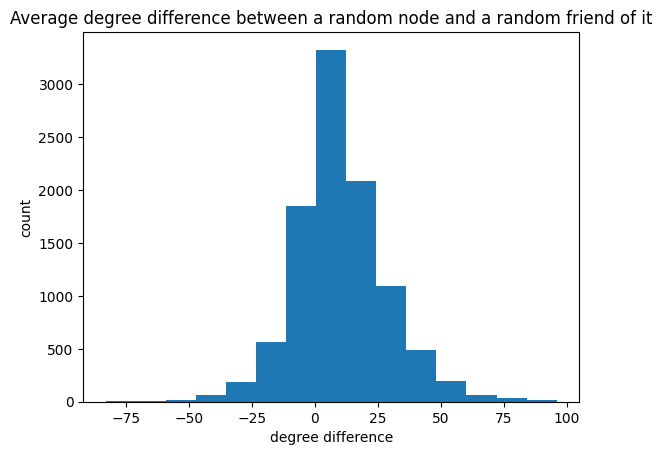

In [100]:
difference = np.array(j_list) - np.array(i_list)

print(f"Average difference: {sum(difference)/len(difference)}")

plt.hist(difference, bins=15)
plt.title("Average degree difference between a random node and a random friend of it")
plt.xlabel("degree difference")
plt.ylabel("count")
plt.show()


Q6

In [220]:
k_avg_new = 1

n = 4096
k_avg_new_list =  np.linspace(0.001, 2, 200)
sample_size = 100
size_poisson_list_single, size_geometric_list_single = [], []

def num_reachable_node(node, network: Network):
    queue = deque([node])
    reachable_nodes = set([node])
    
    while queue: # bfs search
        curr_node = queue.popleft()
        reachable_nodes.add(curr_node)
        queue += network.neighbors(curr_node) - reachable_nodes
    
    return len(reachable_nodes) - 1
    
for k_avg_new in k_avg_new_list:
    node = np.random.randint(0, n)
    size_poisson_list_single.append(num_reachable_node(node, Poisson_Network(n, k_avg_new)))
    size_geometric_list_single.append(num_reachable_node(node, Geometric_Network(n, k_avg_new)))

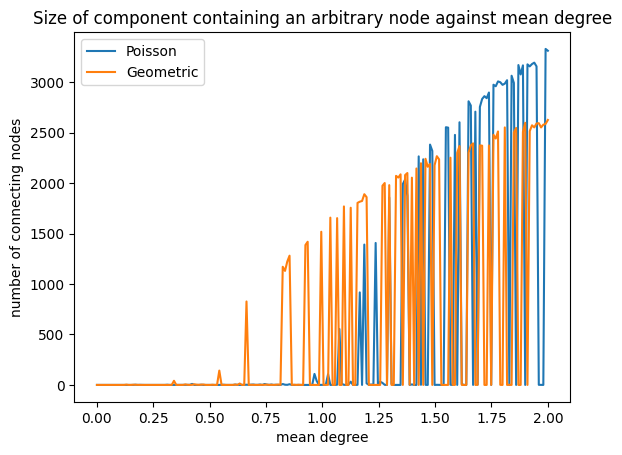

In [221]:
plt.plot(k_avg_new_list, size_poisson_list_single, label="Poisson")
plt.plot(k_avg_new_list, size_geometric_list_single, label="Geometric")
plt.legend()
plt.xlabel("mean degree")
plt.ylabel("number of connecting nodes")
plt.title("Size of component containing an arbitrary node against mean degree")
plt.show()

In [216]:
k_avg_new = 1

n = 4096
k_avg_new_list =  np.linspace(0.001, 2, 200)
sample_size = 100
size_poisson_list, size_geometric_list = [], []

def num_reachable_node(node, network: Network):
    queue = deque([node])
    reachable_nodes = set([node])
    
    while queue: # bfs search
        curr_node = queue.popleft()
        reachable_nodes.add(curr_node)
        queue += network.neighbors(curr_node) - reachable_nodes
    
    return len(reachable_nodes) - 1
    
for k_avg_new in k_avg_new_list:
    total_poisson, total_geometric = 0, 0
    for _ in range(sample_size):
        node = np.random.randint(0, n)
        total_poisson += num_reachable_node(node, Poisson_Network(n, k_avg_new))
        total_geometric += num_reachable_node(node, Geometric_Network(n, k_avg_new))
    size_poisson_list.append(total_poisson / sample_size)
    size_geometric_list.append(total_geometric / sample_size)

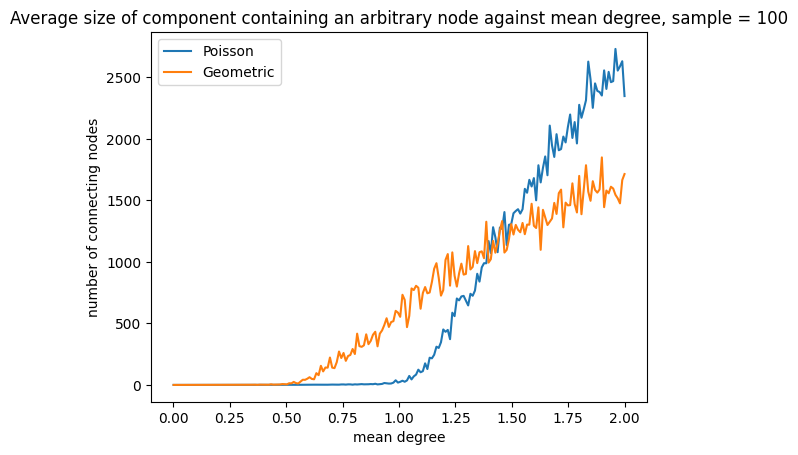

In [222]:
plt.plot(k_avg_new_list, size_poisson_list, label="Poisson")
plt.plot(k_avg_new_list, size_geometric_list, label="Geometric")
plt.legend()
plt.xlabel("mean degree")
plt.ylabel("number of connecting nodes")
plt.title(f"Average size of component containing an arbitrary node against mean degree, sample = {sample_size}")
plt.show()

Q7

In [374]:
def lightly_shuffle(lst, shuffle_factor):
    n = len(lst)
    num_swaps = int(n * shuffle_factor)

    for _ in range(num_swaps):
        i, j = random.sample(range(n), 2)
        lst[i], lst[j] = lst[j], lst[i]

    return lst

def split_by_freq(lst):
    freq_counter = Counter(lst)
    sorted_items = sorted(freq_counter.items(), key=lambda x: x[1], reverse=True)
    half = len(sorted_items)//4 * 3
    more_freq_items, less_freq_items = sorted_items[:half], sorted_items[half+1:]
    more_freq_sorted_list, less_freq_sorted_list = [], []
    for item, freq in list(more_freq_items):
        more_freq_sorted_list.extend([item] * freq)
    for item, freq in list(less_freq_items):
        less_freq_sorted_list.extend([item] * freq)
    
    return more_freq_sorted_list, less_freq_sorted_list

class Correlated_Poisson_Network(Network):
    def __init__(self, num_nodes, k_avg, shuffle_factor = 0.1):
        super().__init__(num_nodes)

        S = np.array([i for i in range(num_nodes) for _ in range(np.random.poisson(k_avg))])  

        more_freq, less_freq = split_by_freq(S)
        more_freq = np.random.permutation(more_freq)
        less_freq = np.random.permutation(less_freq)

        if len(more_freq) % 2:
            more_freq = more_freq[:-1]
        more_freq = more_freq.reshape(-1, 2)

        if len(less_freq) % 2:
            less_freq = less_freq[:-1]
        less_freq = less_freq.reshape(-1, 2)

        all = np.concatenate((more_freq, less_freq), axis=0)
        up, low = lightly_shuffle(all[:,0], shuffle_factor), all[:,1]

        for k in range(len(all)):
            i, j = up[k], low[k]
            if i != j:
                self.add_edge(i, j)

class Correlated_Geometric_Network(Network):
    def __init__(self, num_nodes, k_avg, shuffle_factor = 0.1):
        super().__init__(num_nodes)

        S = np.array([i for i in range(num_nodes) for _ in range(np.random.geometric(1 / (k_avg + 1))-1)])  

        more_freq, less_freq = split_by_freq(S)
        more_freq = np.random.permutation(more_freq)
        less_freq = np.random.permutation(less_freq)

        if len(more_freq) % 2:
            more_freq = more_freq[:-1]
        more_freq = more_freq.reshape(-1, 2)

        if len(less_freq) % 2:
            less_freq = less_freq[:-1]
        less_freq = less_freq.reshape(-1, 2)

        all = np.concatenate((more_freq, less_freq), axis=0)
        up, low = lightly_shuffle(all[:,0], shuffle_factor), all[:,1]
        
        for k in range(len(all)):
            i, j = up[k], low[k]
            if i != j:
                self.add_edge(i, j)

Average degree of a random chosen node: 9.767869639108268
Average degree of a random chosen friend: 10.6523


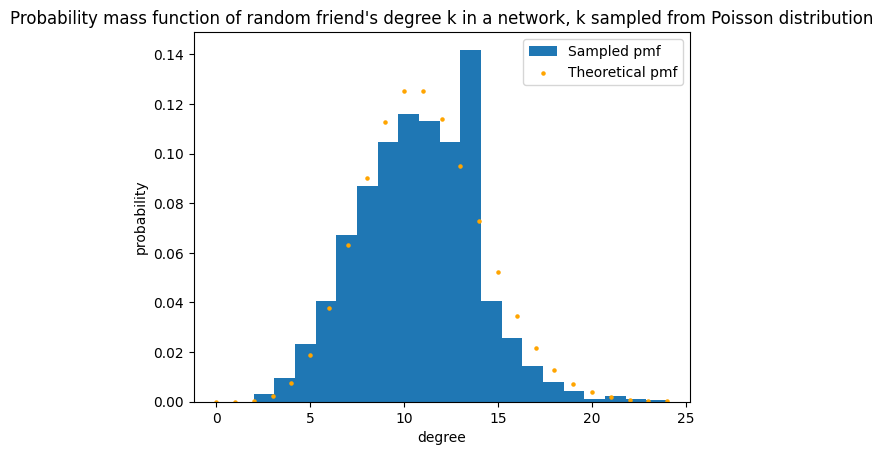

In [393]:
correlated_poisson = Correlated_Poisson_Network(n, k_avg)
i_list, j_list = [], []

for _ in range(10000):
    i = np.random.randint(0, n)
    while not len(correlated_poisson.neighbors(i)): # the node has no friend
        i_list.append(0)
        i = np.random.randint(0, n)
    j = random.choices(list(correlated_poisson.neighbors(i)), k=1)[0]

    i_list.append(len(correlated_poisson.neighbors(i)))
    j_list.append(len(correlated_poisson.neighbors(j)))

print(f"Average degree of a random chosen node: {np.average(i_list)}")
print(f"Average degree of a random chosen friend: {np.average(j_list)}")


degree_list = np.arange(0, 25, 1)
p_list = scipy.stats.poisson.pmf(degree_list, k_avg)
q_list = degree_list*p_list / k_avg

plt.hist(j_list, bins=20, density=True, label="Sampled pmf")
plt.scatter(degree_list, q_list, color="orange", label="Theoretical pmf", s=5)
plt.title("Probability mass function of random friend's degree k in a network, k sampled from Poisson distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()

Average degree of a random chosen node: 10.082894019269224
Average degree of a random chosen friend: 17.8718


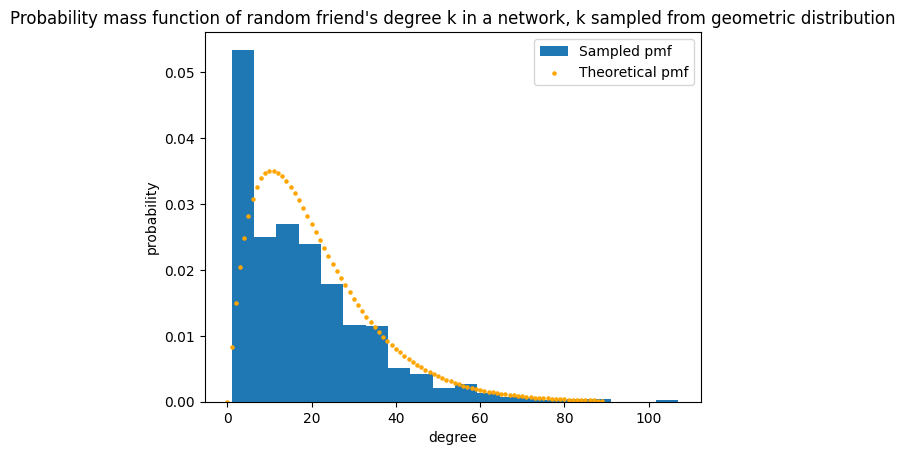

In [399]:
correlated_geometric = Correlated_Geometric_Network(n, k_avg)
i_list, j_list = [], []

for _ in range(10000):
    i = np.random.randint(0, n)
    while not len(correlated_geometric.neighbors(i)): # the node has no friend
        i_list.append(0)
        i = np.random.randint(0, n)
    j = random.choices(list(correlated_geometric.neighbors(i)), k=1)[0]

    i_list.append(len(correlated_geometric.neighbors(i)))
    j_list.append(len(correlated_geometric.neighbors(j)))

print(f"Average degree of a random chosen node: {np.average(i_list)}")
print(f"Average degree of a random chosen friend: {np.average(j_list)}")


degree_list = np.arange(0, 90, 1)
p_list = scipy.stats.geom.pmf(degree_list + 1, p)
q_list = degree_list*p_list / k_avg

plt.hist(j_list, bins=20, density=True, label="Sampled pmf")
plt.scatter(degree_list, q_list, color="orange", label="Theoretical pmf", s=5)
plt.title("Probability mass function of random friend's degree k in a network, k sampled from geometric distribution")
plt.xlabel("degree")
plt.ylabel("probability")
plt.legend()
plt.show()